## **Linear Regression**

In [2]:
# =============================================================
# Linear Regression
# For 3rd Year IE Bachelor Students
# =============================================================

# Learning Objectives:
# 1) Apply Linear Regression using gradient descent, scikit-learn, and normal equation
# 2) Solve simple and multiple linear regression problems
# 3) Split data into training and testing sets
# 4) Evaluate regression performance using appropriate metrics
# 5) Visualize regression results (simple linear regression)
# =============================================================

In [3]:
# -----------------------------
# Part 0: Import Required Libraries
# -----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Custom function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Set random seed for reproducibility
np.random.seed(42)

# =============================================================

#### =============================================================
#### **Part 1: Simple Linear Regression**
#### Dataset: BookRead_Data.csv
#### =============================================================

In [4]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
# Expected structure (example):
# X: HoursSpentReading (Feature): The number of hours spent reading per week, ranging from 0 to 20 hours.
#    This feature captures the amount of time an individual dedicates to reading each week.
# y: The number of books read per month, with values ranging from 0 to 10 books.
#    This target variable represents the outcome influenced by the amount of weekly reading time.

path_bookRead = "/content/drive/MyDrive/Lecture Note/Year 4/Semester 2/INTRO ML IE/Python Code/Linear Regression/Data/BookRead_Data.csv"
data_simple = pd.read_csv(path_bookRead)

# Display first 5 rows
data_simple.head()

,HoursSpentReading,BooksRead
0,0.468227,0.270544
1,6.688963,1.389167
2,9.765886,2.194081
3,15.384615,3.700081
4,3.344482,0.900937


In [6]:
# -----------------------------
# Step 2: Separate Features (X) and Target (y)
# -----------------------------

# Column 0: Feature (X)
# Column 1: Target (y)

X_simple = data_simple.iloc[:, 0].values.reshape(-1, 1)
y_simple = data_simple.iloc[:, 1].values

# Hint: .values converts a pandas Series or DataFrame into a NumPy array.
# since scikit-learn models (e.g. LinearRegression) are built to work with NumPy arrays, not pandas objects.

# .reshape(-1, 1) makes sure the input has one column, because scikit-learn always expects features in a matrix form (2D array)
# so it converts 1D array to 2D array, e.g. (m,)  →  (m, 1)
# We do not reshape y since scikit-learn expects y as a 1D array of shape (m,).

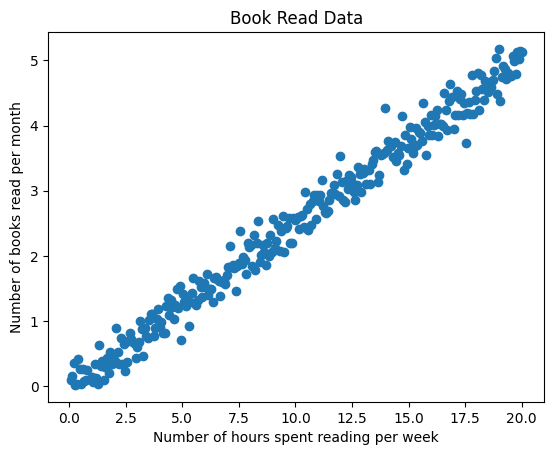

In [7]:
# -----------------------------
# Step 3: Visualization (Data only)
# -----------------------------

plt.figure()
plt.scatter(X_simple, y_simple)
plt.xlabel("Number of hours spent reading per week")
plt.ylabel("Number of books read per month")
plt.title("Book Read Data")
plt.show()

##**Gradient Descent in Simple Linear Regression (SLR)**:

$$\theta_{new} = \theta_{old} - \alpha ⋅ \frac{\partial \theta}{\partial \theta}  J(\theta)$$

Where
- $J(\theta) = J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{j=1}^m((\theta_0 + \theta_1x_j) - y_i)^2$
- $\theta = \begin{bmatrix}\theta_0&  \theta_1 \end{bmatrix}^T$

So,

$$\begin{bmatrix}\theta_{0,new}\\  \theta_{1, new} \end{bmatrix} = \begin{bmatrix}\theta_{0,old}\\  \theta_{1, old} \end{bmatrix} - \frac{\alpha}{m} ⋅ \begin{bmatrix}\sum_{j=1}^m((\theta_0 + \theta_1x_j) - y_i)\\  \theta_{1,old}⋅\sum_{j=1}^m((\theta_0 + \theta_1x_j) - y_i) \end{bmatrix}$$

In [8]:
# -----------------------------
# Step 4: Gradient Descent (Vector–Matrix Form)
# -----------------------------

# Learning settings
alpha = 0.01          # learning rate
n_iters = 20000       # number of iterations
m = y_simple.size     # number of samples

# Design matrix X (add bias term)
X_gd = np.c_[np.ones(m), X_simple]       # shape: (m, 2)

# Target vector y
y_gd = y_simple.reshape(-1, 1)           # shape: (m, 1)

# Initialize parameters θ = [θ0, θ1]ᵀ
# Initial State; h = [0 0]
theta = np.zeros((2, 1))                 # shape: (2, 1)
state = {0: theta}

# Gradient Descent Loop
for i in range(n_iters):
    h = np.dot(X_gd, theta)              # hypothesis: (m, 1), y_pred = X_gd * theta
    gradient = (1 / m) * np.dot(X_gd.T, (h - y_gd))
    theta = theta - alpha * gradient
    state[i] = theta

# Extract parameters
theta0 = theta[0, 0]
theta1 = theta[1, 0]

print("Gradient Descent Intercept (b0):", theta0)
print("Gradient Descent Coefficient (b1):", theta1)

Gradient Descent Intercept (b0): -0.012917202117970566
Gradient Descent Coefficient (b1): 0.2514148736124623


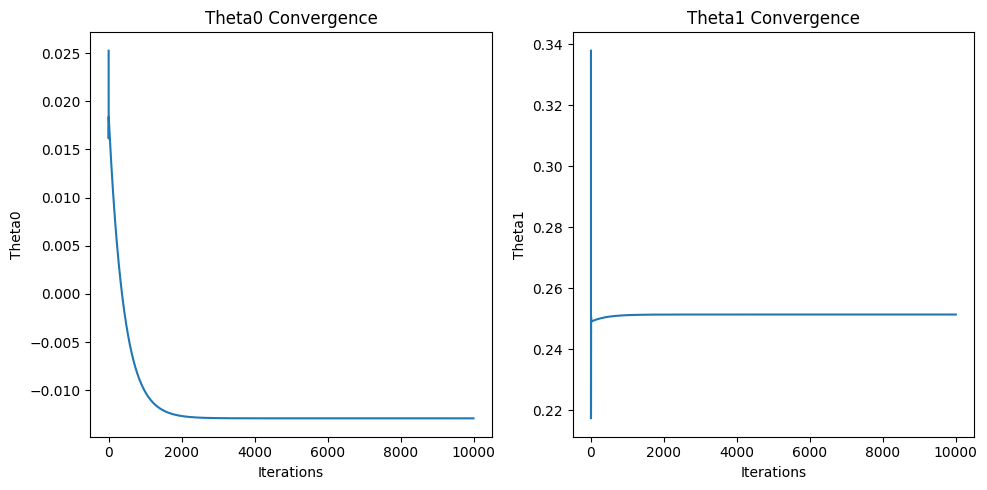

In [45]:
# Plot state of theta with 2 subplots

first_n_iters = 10000

theta_history = np.array([state[i].flatten() for i in range(first_n_iters)])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(first_n_iters), theta_history[:, 0])
plt.xlabel("Iterations")
plt.ylabel("Theta0")
plt.title("Theta0 Convergence")

plt.subplot(1, 2, 2)
plt.plot(range(first_n_iters), theta_history[:, 1])
plt.xlabel("Iterations")
plt.ylabel("Theta1")
plt.title("Theta1 Convergence")

plt.tight_layout()
plt.show()

In [9]:
# -----------------------------
# Step 4.1: Make Predictions (gradient descent)
# -----------------------------

# Predictions using Gradient Descent
y_pred_gd = np.dot(X_gd, theta)

print("First five prediction values from gradient descent: \n", y_pred_gd.flatten()[0:5])

First five prediction values from gradient descent: 
 [0.10480214 1.66878764 2.44237186 3.85500393 0.82793522]


In [10]:
# -----------------------------
# Step 5: scikit-learn Linear Regression
# -----------------------------
model_simple_sk = LinearRegression()
model_simple_sk.fit(X_simple, y_simple)

# LinearRegression() defines type of the model, i.e. it creates a linear regression model object.
# .fit(X, y) trains the model by finding the best parameters that minimize the cost function.

# Model parameters
print("Intercept (b0):", model_simple_sk.intercept_)
print("Coefficient (b1):", model_simple_sk.coef_[0])

Intercept (b0): -0.012917202117971094
Coefficient (b1): 0.25141487361246234


You can read a document about `LinearRegression()` via [Link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [11]:
# -----------------------------
# Step 5.1: Make Predictions (scikit-learn)
# -----------------------------
y_pred_simple_sk = model_simple_sk.predict(X_simple)

# After training, .predict() uses the learned equation to calculate predicted y values.
# No cost function minimization here & No parameter update.

print("First five prediction values from scikit-learn: \n", y_pred_simple_sk[0:5])

First five prediction values from scikit-learn: 
 [0.10480214 1.66878764 2.44237186 3.85500393 0.82793522]


In [12]:
# -----------------------------
# Step 6: Compare the differences of the learned coefficients (Gradient descent vs. scikit-learn)
# -----------------------------
print("Difference in Intercept:", abs(theta0 - model_simple_sk.intercept_))
print("Difference in Coefficient:", abs(theta1 - model_simple_sk.coef_[0]))

Difference in Intercept: 5.273559366969494e-16
Difference in Coefficient: 5.551115123125783e-17


### Evaluate Model
MSE (Mean Square Error):
$$
MSE = \frac{1}{m}\sum_{i=1}^m(y_j - \hat{y}_j)^2
$$

R-squared:
$$
R^2 = 1 - \frac{\sum_{i=1}^m(y_j - \hat{y}_j)^2}{\sum_{i=1}^m(y_j - \bar{y})^2}
$$

where $\bar{y} = \frac{1}{m}\sum_{i=1}^m(y)$

In [13]:
# -----------------------------
# Step 7: Evaluate Model Performance (for the predictions from scikit-learn)
# -----------------------------
mse_simple = mean_squared_error(y_simple, y_pred_simple_sk)
r2_simple = r2_score(y_simple, y_pred_simple_sk)

# MSE measures how far predictions are from the true values.
# R² measures how well the model explains the variation in the data.
# Note: Cost J = 1/2 * MSE in the lecture.

print("Mean Squared Error (MSE):", mse_simple)
print("R-squared (R²):", r2_simple)
print("MAPE (%):", mean_absolute_percentage_error(y_simple, y_pred_simple_sk))

Mean Squared Error (MSE): 0.0380331782585041
R-squared (R²): 0.9820890136304049
MAPE (%): 18.083342782193657


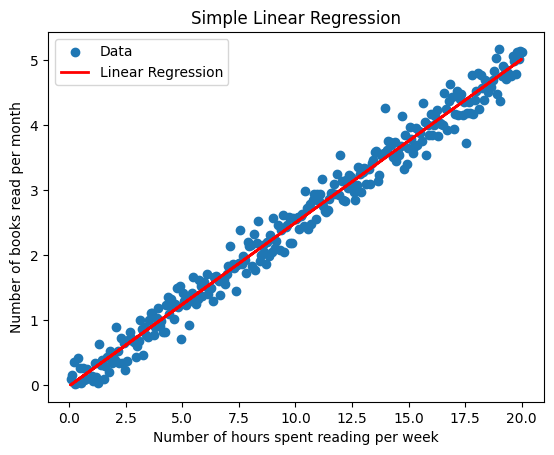

In [14]:
# -----------------------------
# Step 8: Visualization (Data and Regression Line)
# -----------------------------
plt.figure()
plt.scatter(X_simple, y_simple, label="Data")
plt.plot(X_simple, y_pred_simple_sk, color='red', linewidth=2, label="Linear Regression")
plt.xlabel("Number of hours spent reading per week")
plt.ylabel("Number of books read per month")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [15]:
# -----------------------------
# Step 9: Calculate cost function J
# -----------------------------

m = len(y_simple)  # Number of training samples

J = (1 / (2 * m)) * np.sum((y_pred_simple_sk - y_simple) ** 2)
print("Cost function value J(theta):", J)

Cost function value J(theta): 0.01901658912925205


## **Multiple Linear Regression (MLR)**

### Design Matrix
Let the design matrix be $\mathbf{X} \in \mathbb{R}^{m \times (n+1)}$ is
$
$\begin{bmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1n} \\
1 & x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}$
$

where:
- $m$ is the number of samples  
- $n$ is the number of features  
- the first column of ones represents the bias term  

---

### Target Vector
$$\mathbf{y} =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix} \in \mathbb{R}^{m \times 1}
$$

---

### Parameter Vector
$$
\theta =
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{bmatrix}
\in \mathbb{R}^{(n+1) \times 1}
$$

where $\theta_0$ is the bias (intercept) term.

---

### Multiple Linear Regression Model
Matrix form:
$$
\mathbf{\hat{y}} = \mathbf{X}\mathbf{\theta}
$$

Element-wise:
$$
\hat{y}_i = \theta_0 + \sum_{j=1}^{n} \theta_j x_{ij},
\quad i = 1, 2, \dots, m
$$


#### =============================================================
#### **Part 2: Multiple Linear Regression**
#### Dataset: Advertising_Data.csv
#### =============================================================

In [16]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
path_AdvertistingData = "/content/drive/MyDrive/Lecture Note/Year 4/Semester 2/INTRO ML IE/Python Code/Linear Regression/Data/Advertising_Data.csv"
data_multi = pd.read_csv(path_AdvertistingData)

# Display dataset information
data_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
# -----------------------------
# Step 2: Define Features (X) and Target (y)
# -----------------------------
# Example structure (typical advertising dataset):
# X = [TV, Radio, Newspaper]
# y = Sales

X_multi = data_multi.iloc[:, :-1]  # Return all rows & all columns except the last column
                                   # No need .reshape() here since it returns Dataframe (2D)
y_multi = data_multi.iloc[:, -1]   # Retuen all rows & the last column

In [18]:
X_multi.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
# -----------------------------
# Step 3: Train-Test Split (80:20)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
X_multi, y_multi, test_size = 0.2, random_state = 42
)

# train_test_split() : Randomly splits the dataset into training and test sets
# test_size = 0.2 : 20% of the data → test set and 80% of the data → training set
# random_state = 42 : Fixes the random number generator, ensures the same split every time, and guarantees reproducible results

print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])

Number of training samples: 160
Number of testing samples: 40


`StandardScaler()`

Formula:

$$
scale(X_i) = \frac{X_i - \bar{X_i}}{Stdev(X_i)}
$$

for $i = 1, 2, 3, ..., n$

In [20]:
# -----------------------------
# Step 3: Gradient Descent using SGDRegressor
# -----------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

scaler = StandardScaler()      # Gradient-descent requires feature scaling
X_train_scaled = scaler.fit_transform(X_train) # Calculate mu (Xbar), stdev to scale training dataset
X_test_scaled = scaler.transform(X_test)

# Note: do not use .fit_transform with X_test.
# We fit the scaler on training data and apply it to test data to avoid data leakage and ensure fair evaluation.
# In real life, we don’t know the statistics of future data. We must use only training data to decide how to scale.

sgd_model = SGDRegressor(
  loss = "squared_error",       # define the cost function to mean squared error
  penalty = None,               # Turn off regularization
  learning_rate = "constant",   # the learning rate is exactly eta0, and it does not change during training.
  eta0 = 0.01,                  # learning rate (= alpha in lecture slide)
  max_iter = 100000,            # number of iterations
  tol = 1e-8,                   # if the improvement in the cost function between iterations is smaller than tol, training stops.
  random_state = 42
)

sgd_model.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='constant', max_iter=100000, penalty=None,
             random_state=42, tol=1e-08)

Remind:

If you use `Gradient Descent` more than one features, You must scale **all feature** before train model!

In [21]:
# -----------------------------
# Step 4: scikit-learn Linear Regression (used Normal Equation internally)
# -----------------------------
model_multi_sk = LinearRegression()
model_multi_sk.fit(X_train, y_train) # Non scaling

LinearRegression()

In [22]:
# -----------------------------
# Step 4.1.1: Model Coefficients (scikit-learn)
# -----------------------------
coeff_df = pd.DataFrame({
"Feature": X_multi.columns,
"Coefficient": model_multi_sk.coef_
})

# X_multi.columns : .columns returns the column names (feature names)
# model_multi_sk.coef_ : NumPy array that contains the learned coefficients but does not include the intercept
# pd.DataFrame({ ... }) : Create a new Pandas Dataframe from a dictionary where
#                         each key becomes a column name, and the values become the column data.
# Intercept is stored separately: model_multi_sk.intercept_

print("Intercept: ", model_multi_sk.intercept_)
coeff_df

Intercept:  2.979067338122629


,Feature,Coefficient
0,TV,0.044730
1,radio,0.189195
2,newspaper,0.002761


With 4.1.1 (By Normal Equation with X non-scaling), the coefficient of Radio is highest.

In [23]:
# -----------------------------
# Step 4.1.2: Model Coefficients (gradient)
# -----------------------------
sgd_model.fit(X_train_scaled, y_train)

coeff_df_new = pd.DataFrame({
"Feature": X_multi.columns,
"Coefficient": sgd_model.coef_
})

coeff_df_new

,Feature,Coefficient
0,TV,3.869173
1,radio,2.776040
2,newspaper,0.150145


With 4.1.2 (By Gradient with X scaling), the coefficient of TV is highest.

In [24]:
# -----------------------------
# Step 4.2: Predictions (scikit-learn)
# -----------------------------
y_train_pred_sk = model_multi_sk.predict(X_train)
y_test_pred_sk = model_multi_sk.predict(X_test)

In [25]:
# -----------------------------
# Step 4.3: Evaluation Metrics
# -----------------------------
# Note: For regression, we do NOT use accuracy.
# Common metrics: MSE, MAE, R², MAPE

# Training performance
mse_train = mean_squared_error(y_train, y_train_pred_sk)
r2_train = r2_score(y_train, y_train_pred_sk)

# Testing performance
mse_test = mean_squared_error(y_test, y_test_pred_sk)
r2_test = r2_score(y_test, y_test_pred_sk)

print("=== Training Performance ===")
print("MSE:", mse_train)
print("R²:", r2_train)
print("MAPE (%):", mean_absolute_percentage_error(y_train, y_train_pred_sk))

print("")

print("=== Testing Performance ===")
print("MSE:", mse_test)
print("R²:", r2_test)
print("MAPE (%):", mean_absolute_percentage_error(y_test, y_test_pred_sk))

=== Training Performance ===
MSE: 2.705129423081414
R²: 0.8957008271017818
MAPE (%): 13.651462127119013

=== Testing Performance ===
MSE: 3.1740973539761033
R²: 0.899438024100912
MAPE (%): 15.198846602831226


In [26]:
# -----------------------------
# Step 4.4: Calculate cost function J (scikit-learn)
# -----------------------------

m = len(y_train)   # Number of samples

J_train = (1 / (2 * m)) * np.sum((y_train_pred_sk - y_train) ** 2)
print("Cost function value J_train(theta):", J_train)

m_test = len(y_test)

J_test = (1 / (2 * m_test)) * np.sum((y_test_pred_sk - y_test) ** 2)
print("Cost function value J_test(theta):", J_test)

Cost function value J_train(theta): 1.352564711540707
Cost function value J_test(theta): 1.5870486769880516


For MLR, you can use Normal Equation to find the explicit solution:

$$\theta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [27]:
# -----------------------------
# Step 5: Normal Equation (Explicit)
# -----------------------------
# Use the SAME training data from multiple linear regression

X_train_ne = np.c_[np.ones(X_train.shape[0]), X_train.values]
y_train_ne = y_train.values.reshape(-1, 1)

# np.c_ means column-wise concatenation.
# X_train.values converts the pandas DataFrame to a NumPy array (shape (m, n).
# y_train.values converts pandas Series (m,) to NumPy array (m, 1).
# When using scikit-learn, pandas is fine. When doing matrix math ourselves, always convert to NumPy arrays.

In [28]:
# -----------------------------
# Step 5.1: Normal Equation Formula
# theta = (X^T X)^(-1) X^T y
# -----------------------------

theta_ne = np.dot(np.dot(np.linalg.inv(np.dot(X_train_ne.T, X_train_ne)), X_train_ne.T), y_train_ne)

# or
# theta_ne = np.linalg.inv(X_train_ne.T @ X_train_ne) @ X_train_ne.T @ y_train_ne

# theta_ne is a NumPy column vector containing the intercept and coefficients. Its shape is (n+1, 1)

print("Theta from Normal Equation:")
print(theta_ne)
print()
print("Shape of theta_ne:", theta_ne.shape, "\n")
#------------------------------------------------
print("Estimated y equation is")

equation = ""; i = 0
for coeff in theta_ne:
  equation += str(round(coeff[0], 4)) + f'*X_{i} + '
  i += 1

print(f'Y = {equation[:-2].replace("*X_0","")}')

Theta from Normal Equation:
[[2.97906734e+00]
 [4.47295175e-02]
 [1.89195054e-01]
 [2.76111434e-03]]

Shape of theta_ne: (4, 1) 

Estimated y equation is
Y = 2.9791 + 0.0447*X_1 + 0.1892*X_2 + 0.0028*X_3 


Remark:

If $\mathbf{X}^T\mathbf{X}$ can not find inverse matrix $((\mathbf{X}^T\mathbf{X})^{-1})$, then The solution is **not** unique.

Because
- #training dataset ($m$) < #features ($n$)
- for some $X_i$ and $X_j$ ,which $i \neq j$ $⇒$ $X_i$ and $X_j$ are linearly dependent ⇔ $X_i = cX_j$ where $c ∈ ℝ$.
- How to fix them??? $⇒$ Add regularization term.

Note: If $m$ is too large, Normal Equation is high time consume ☠️.

In [29]:
# -----------------------------
# Step 5.2: Extract Intercept and Coefficients
# -----------------------------
intercept_ne = theta_ne[0][0]
coef_ne = theta_ne[1:].flatten()

# These two lines extract the intercept and coefficients from the normal equation solution
# and convert them into the same format used by scikit-learn.

# theta_ne[0][0] extracts the first element of the first row (intercept term).
# theta_ne[1:] takes everything except the first row.
# .flatten() converts (n, 1) → (n,).

print("Normal Equation Intercept:", intercept_ne)
print("Normal Equation Coefficients:", coef_ne)

Normal Equation Intercept: 2.979067338122612
Normal Equation Coefficients: [0.04472952 0.18919505 0.00276111]


In [30]:
# -----------------------------
# Step 6: Compare coefficients from SGDRegressor vs. scikit-learn vs. Normal equation
# -----------------------------

print("=== Gradient Descent (SGDRegressor) ===")
print("Intercept:", sgd_model.intercept_)
print("Coefficients:", sgd_model.coef_)

print("")

print("=== scikit-learn LinearRegression ===")
print("Intercept:", model_multi_sk.intercept_)
print("Coefficients:", model_multi_sk.coef_)

print("")

print("=== Normal Equation ===")
print("Intercept:", intercept_ne)
print("Coefficients:", coef_ne)

=== Gradient Descent (SGDRegressor) ===
Intercept: [14.06109425]
Coefficients: [3.86917348 2.77604041 0.15014517]

=== scikit-learn LinearRegression ===
Intercept: 2.979067338122629
Coefficients: [0.04472952 0.18919505 0.00276111]

=== Normal Equation ===
Intercept: 2.979067338122612
Coefficients: [0.04472952 0.18919505 0.00276111]


Note: In general, scikit-learn used Normal Equation to slove the explicit theta.

In [31]:
# -----------------------------
# Step 7: Prediction Comparison (Test Set)
# -----------------------------

# Predictions from SGDRegressor (scaled data)
y_test_pred_sgd = sgd_model.predict(X_test_scaled)

# Predictions from scikit-learn
y_test_pred_sk = model_multi_sk.predict(X_test)

# Predictions from Normal Equation

# Prepare test matrix for Normal Equation
X_test_ne = np.c_[np.ones(X_test.shape[0]), X_test.values]

y_test_pred_ne = np.dot(X_test_ne, theta_ne)
y_test_pred_ne = y_test_pred_ne.flatten()

print("Compare the first five prediction values of the test set")
comparison_df = pd.DataFrame({
    "Actual y": y_test.values[:5],
    "SGDRegressor": y_test_pred_sgd[:5],
    "Scikit-learn": y_test_pred_sk[:5],
    "Normal Equation": y_test_pred_ne[:5]
})

comparison_df

Compare the first five prediction values of the test set


,Actual y,SGDRegressor,Scikit-learn,Normal Equation
0,16.9,16.482696,16.408024,16.408024
1,22.4,20.986852,20.889882,20.889882
2,21.4,21.748761,21.553843,21.553843
3,7.3,10.452454,10.608503,10.608503
4,24.7,22.008109,22.112373,22.112373


##### =============================================================
##### Notes for Students:
##### - SGDRegressor uses gradient descent, which is iterative and approximate and stops near the minimum.
##### - The other methods compute the exact solution.
##### - That is why the results are very close but not identical.
##### - SGDRegressor uses gradient descent and, by default, adds regularization. Scikit-learn (LinearRegression) does not. When we turn off regularization, the results become very close.”
##### =============================================================

### =============================================================
### **Part 3: Polynomial Regression**
### Dataset: IceCream_Data.csv
### =============================================================

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [33]:
# -----------------------------
# Step 1: Load Dataset
# -----------------------------
path_IceCream = "/content/drive/MyDrive/Lecture Note/Year 4/Semester 2/INTRO ML IE/Python Code/Linear Regression/Data/IceCream_Data.csv"
data_poly = pd.read_csv(path_IceCream)

X_poly_raw = data_poly.iloc[:, 0].values.reshape(-1, 1) # Temperature (X)
y_poly = data_poly.iloc[:, 1].values                    # Ice cream sales (y)

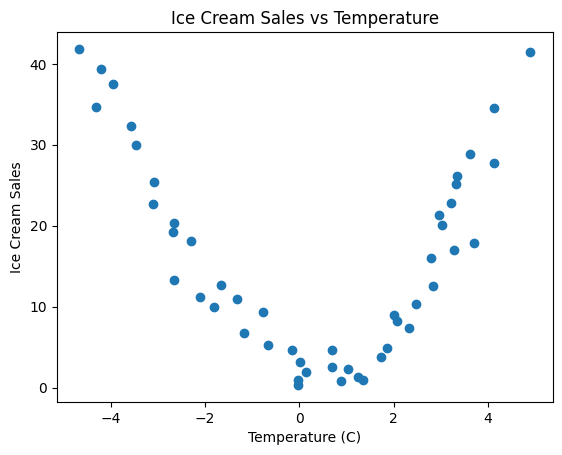

In [34]:
# -----------------------------
# Step 2: Visualize Raw Data
# -----------------------------
plt.figure()
plt.scatter(X_poly_raw, y_poly)
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales")
plt.title("Ice Cream Sales vs Temperature")
plt.show()

In [35]:
# -----------------------------
# Step 3: Compare Linear vs Polynomial Regression
# -----------------------------

# Linear model
linear_model = LinearRegression()
linear_model.fit(X_poly_raw, y_poly)
y_linear_pred = linear_model.predict(X_poly_raw)

# Polynomial model (degree = 2)
poly_model = Pipeline([
("poly", PolynomialFeatures(degree=2, include_bias=False)),
("lin_reg", LinearRegression())
])

# A Pipeline is a way to chain multiple processing steps into a single model.
# Each step: Takes input data, transforms it or learns from it, and passes the result to the next step.
# In this code: X → PolynomialFeatures → LinearRegression → ŷ
# 'poly' and 'lin_reg' are labels that name each step in the pipeline and allow us to manage them later.
# 'poly' represents the feature transformation step: convert x→[x, x^2]
# 'lin_reg' represents the model training step: learn parameters theta
# include_bias=False → avoids adding a column of ones because LinearRegression() already includes an intercept.

poly_model.fit(X_poly_raw, y_poly)

# Internally:
# 1. PolynomialFeatures.fit_transform(X)
# 2. Output passed to LinearRegression.fit()

y_poly_pred = poly_model.predict(X_poly_raw)

# Internally:
# PolynomialFeatures.transform(X)
# Output passed to LinearRegression.predict()

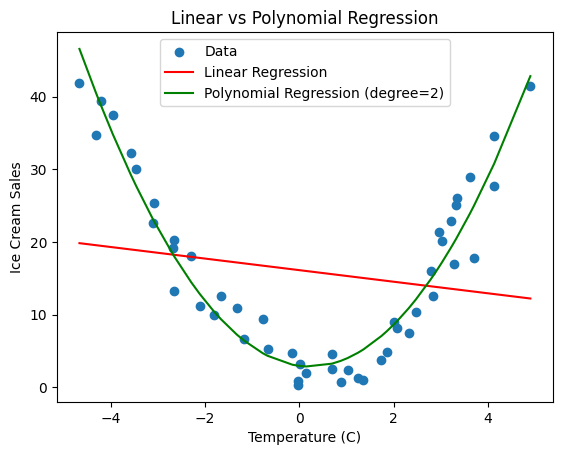

In [36]:
# -----------------------------
# Step 4: Plot Comparison
# -----------------------------

# Sort for smooth plotting
sort_idx = np.argsort(X_poly_raw.flatten())
X_sorted = X_poly_raw[sort_idx]
y_linear_sorted = y_linear_pred[sort_idx]
y_poly_sorted = y_poly_pred[sort_idx]

# The purpose of these block of codes is to draw smooth regression curves instead of zig-zag lines.
# .flatten() converts the dataframe to 1D array (m,) since np.argsort() works on 1D arrays.
# np.argsort(...) returns the indices that would sort the array but not the sorted values themselves.
# We do not sort X_poly_raw to keep X_poly_raw and y aligned.
# Sort X: X_sorted = X_poly_raw[sort_idx]
# Sort linear predictions: y_linear_sorted = y_linear_pred[sort_idx]
# Sort polynomial predictions: y_poly_sorted = y_poly_pred[sort_idx]

plt.figure()
plt.scatter(X_poly_raw, y_poly, label="Data")
plt.plot(X_sorted, y_linear_sorted, color="red", label="Linear Regression")
plt.plot(X_sorted, y_poly_sorted, color="green", label="Polynomial Regression (degree=2)")
plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()

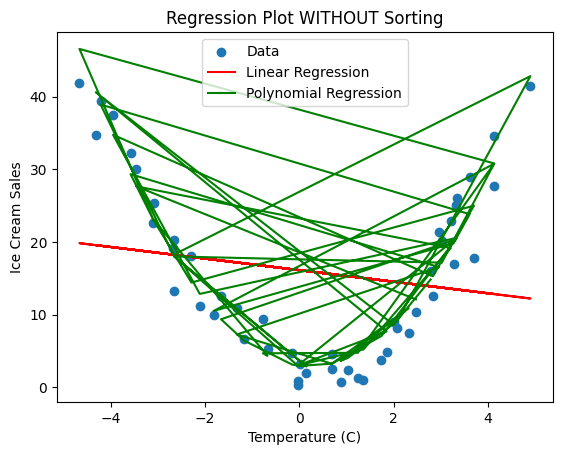

In [37]:
# Compare to the code that does not sort the data

plt.figure()
plt.scatter(X_poly_raw, y_poly, label="Data")

plt.plot(X_poly_raw, y_linear_pred, color="red", label="Linear Regression")
plt.plot(X_poly_raw, y_poly_pred, color="green", label="Polynomial Regression")

plt.xlabel("Temperature (C)")
plt.ylabel("Ice Cream Sales")
plt.title("Regression Plot WITHOUT Sorting")
plt.legend()
plt.show()